In [17]:
# Stock price source - yahoo finance 
#import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#Read stock price csv files 
apple = pd.read_csv("apple.csv")
zoom = pd.read_csv("zoom.csv")
slack = pd.read_csv("slack.csv")
ms = pd.read_csv("microsoft.csv")
google = pd.read_csv("google.csv")
cisco = pd.read_csv("cisco.csv")

#Remove other columns in the df, only keep data and closing price
apple=apple[["Date","Close"]]

zoom=zoom[["Date","Close"]]

slack=slack[["Date","Close"]]

ms=ms[["Date","Close"]]

google=google[["Date","Close"]]

cisco=cisco[["Date","Close"]]

In [9]:
#Merge different stock price dataframe into a combined dataframe
combined_df = pd.merge(apple, zoom, how='outer', on="Date", suffixes=["_Apple", "_Zoom"])
combined_df = pd.merge(combined_df, slack, how='outer', on="Date",  suffixes=["_Zoom", "_Slack"])
combined_df = pd.merge(combined_df, ms, how='outer', on="Date",  suffixes=["_Slack", "_Microsoft"])
combined_df = pd.merge(combined_df, google, how='outer', on="Date",  suffixes=["_Microsoft", "_Google"])
combined_df = pd.merge(combined_df, cisco, how='outer', on="Date",  suffixes=["_Google", "_Cisco"])

#chnage the names for columns
combined_df = combined_df.rename(columns = {"Close_Apple":"Apple","Close_Zoom":"Zoom","Close_Slack":"Slack",
                             "Close_Microsoft":"Microsoft","Close_Google":"Google","Close_Cisco":"Cisco"})
combined_df[["Apple","Zoom","Slack","Microsoft","Google","Cisco"]]=combined_df[["Apple","Zoom","Slack","Microsoft","Google","Cisco"]].round(2)

combined_df.head()


,Date,Apple,Zoom,Slack,Microsoft,Google,Cisco
0,2019-10-31,62.19,69.89,22.00,143.37,1260.11,47.51
1,2019-11-01,63.96,70.39,21.94,143.72,1273.74,47.03
2,2019-11-04,64.38,70.12,21.94,144.55,1291.37,47.48
3,2019-11-05,64.28,66.89,20.75,144.46,1292.03,47.76
4,2019-11-06,64.31,66.83,20.14,144.06,1291.80,48.27


Text(0, 0.5, 'Stock Price ($)')

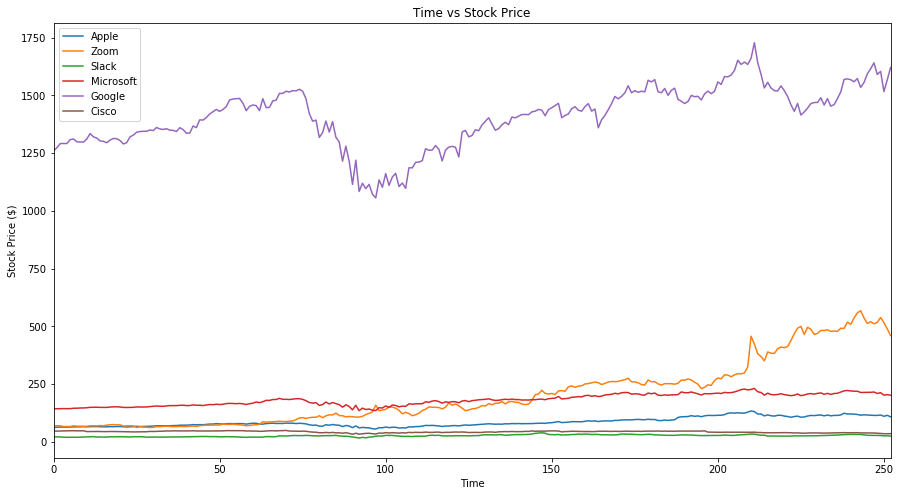

In [21]:
# Create a graph to show relationship 
graph = combined_df.plot(kind="line",figsize=(15,8))
plt.title("Time vs Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price ($)")